# ASINA test set

### Importing libraries and define functions

In [1]:
import pandas as pd
import numpy as np
import scipy
import math
import os

In [2]:
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)
%config InlineBackend.figure_format = 'retina'

In [3]:
# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

In [4]:
import sklearn
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

In [5]:
from pycaret.regression import *

In [6]:
import functions as f

### Define dataset columns

In [7]:
df_columns = ['NP_type', 'Coating','core_size_nm','hydro_size_nm','Surf_charge_mV','Surface_area_m2_g',
               'shape','Dose_microg_mL','Duration_h','Cell_name','Cell_species','cell_Organ','Cell_morphology',
               'Cell_age','cell_type','sex','Assay','Test_indicator','Viability']

### Loading the ASINA test data into the data frame.

In [9]:
tdf = pd.read_csv("input/test_set_asina.txt", sep="\t", encoding="unicode_escape", usecols=df_columns)

In [10]:
data_asina_test_df = f.canonicalize_dataset(tdf)

Does numeric columns have float64 pandas type? 

Duration_h: True
core_size_nm: True
hydro_size_nm: True
Surf_charge_mV: True
Surface_area_m2_g: True
Dose_microg_mL: True
Duration_h: True
Viability: True

Final column types: 

NP_type                object
Coating                object
core_size_nm          float64
hydro_size_nm         float64
Surf_charge_mV        float64
Surface_area_m2_g     float64
shape                  object
Dose_microg_mL        float64
Duration_h            float64
Cell_name              object
Cell_species           object
cell_Organ             object
Cell_morphology        object
Cell_age               object
cell_type              object
sex                    object
Assay                  object
Test_indicator         object
nanomaterial_group     object
Viability             float64
dtype: object

NP types that fall into the 'other' group:
['Ag']


In [11]:
data_asina_test_df.shape

(969, 20)

In [12]:
data_asina_test_df.head()

,NP_type,Coating,core_size_nm,hydro_size_nm,Surf_charge_mV,Surface_area_m2_g,shape,Dose_microg_mL,Duration_h,Cell_name,Cell_species,cell_Organ,Cell_morphology,Cell_age,cell_type,sex,Assay,Test_indicator,nanomaterial_group,Viability
0,Ag,None,150.0,144.04,NaN,NaN,Sphere,1.0,24.0,A549,Human,Lung,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,other,80.15
1,Ag,None,150.0,145.09,NaN,NaN,Sphere,5.0,24.0,A549,Human,Lung,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,other,65.05
2,Ag,None,150.0,146.40,NaN,NaN,Sphere,10.0,24.0,A549,Human,Lung,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,other,64.27
3,Ag,None,150.0,149.02,NaN,NaN,Sphere,20.0,24.0,A549,Human,Lung,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,other,57.01
4,Ag,None,150.0,154.27,NaN,NaN,Sphere,40.0,24.0,A549,Human,Lung,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,other,35.84


In [13]:
data_train_df = pd.read_csv("output/datasets/universal/data_regression_train_df.csv", encoding="utf-8")

### Plot numerical variables distribution of train and ASINA test sets 

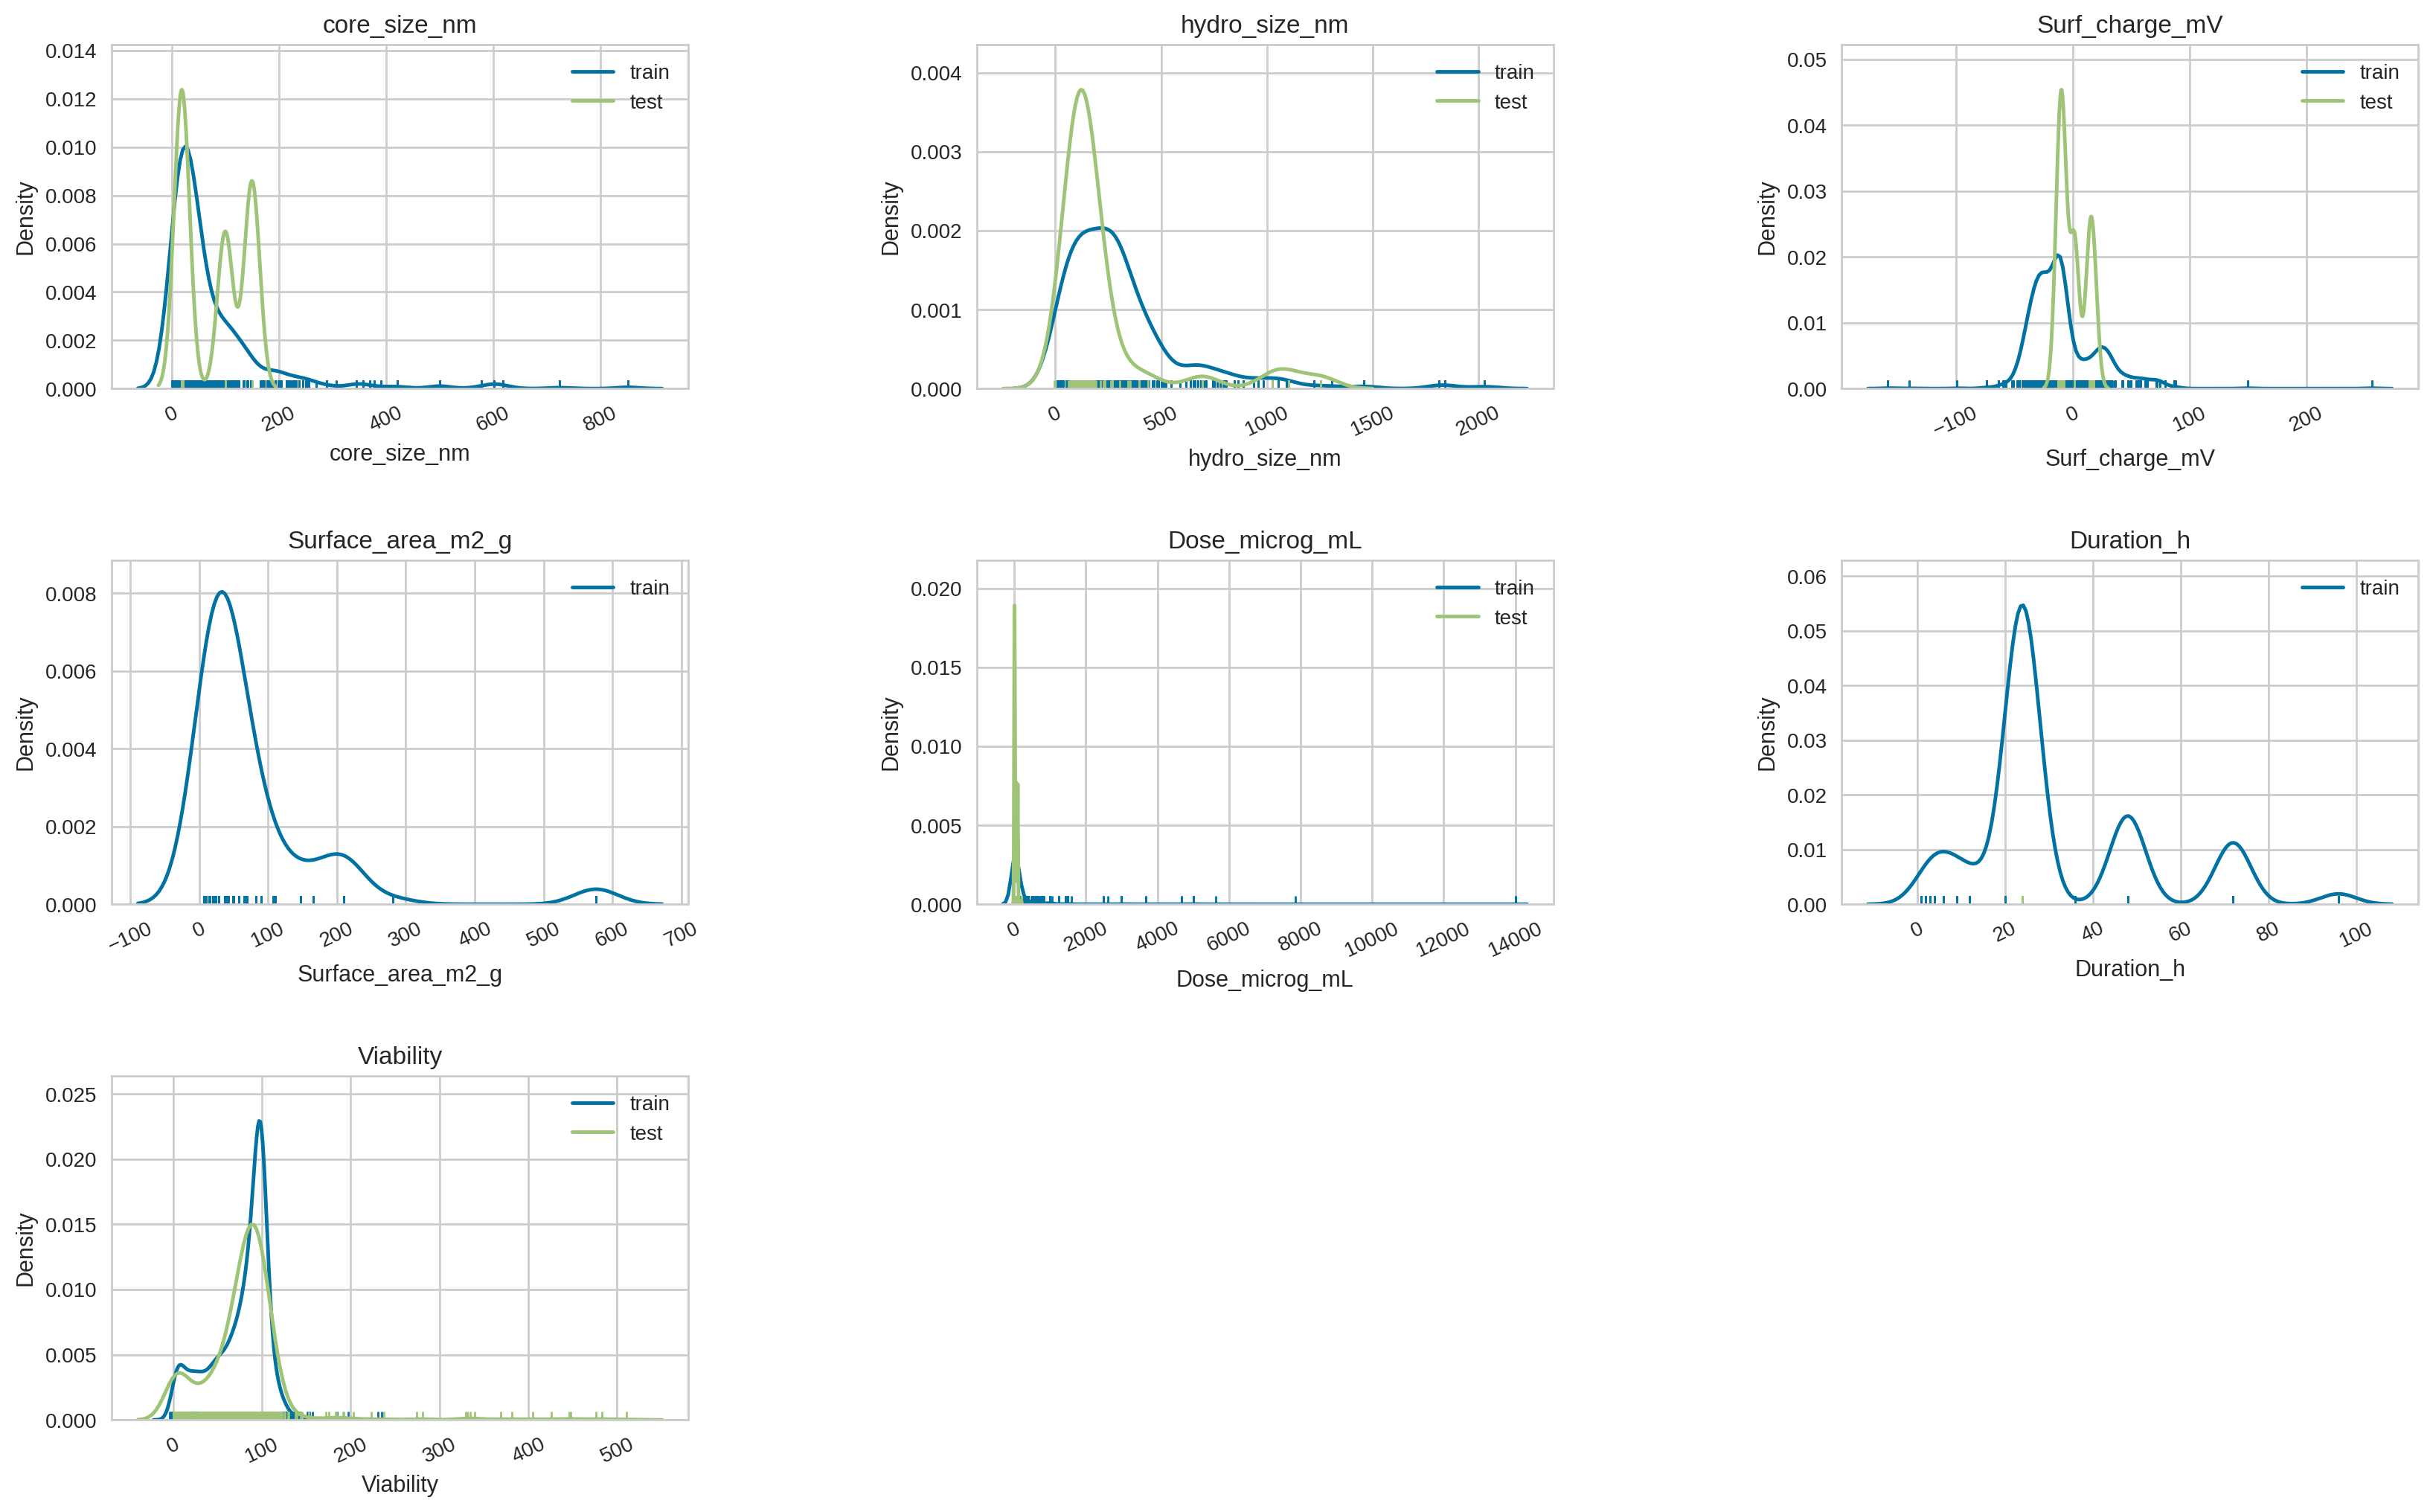

In [14]:
f.plot_distribution_train_test(data_train_df, data_asina_test_df)

In [15]:
for i in data_train_df.columns:
    print(i)
    unique_train = len(set(data_train_df[i].tolist()))
    unique_test = len(set(data_asina_test_df[i].tolist()))
    unique_intersect = len(set(data_train_df[i].tolist()).intersection(set(data_asina_test_df[i].tolist())))
    print(str(unique_train) + " - " + str(unique_test) + " - " + str(unique_intersect))

NP_type
53 - 2 - 2
Coating
34 - 4 - 2
core_size_nm
516 - 4 - 4
hydro_size_nm
1914 - 579 - 2
Surf_charge_mV
403 - 809 - 2
Surface_area_m2_g
3306 - 969 - 0
shape
13 - 2 - 2
Dose_microg_mL
240 - 16 - 16
Duration_h
277 - 1 - 1
Cell_name
82 - 2 - 2
Cell_species
8 - 1 - 1
cell_Organ
30 - 2 - 2
Cell_morphology
16 - 1 - 1
Cell_age
5 - 1 - 1
cell_type
3 - 1 - 1
sex
3 - 1 - 1
Assay
19 - 3 - 3
Test_indicator
13 - 2 - 1
nanomaterial_group
5 - 2 - 2
Viability
2746 - 913 - 279


### Prepare classification dataframes

In [21]:
data_classification_asina_test_df = f.convert_to_classification_dataset(data_asina_test_df.copy())

In [22]:
data_classification_asina_test_df.shape

(969, 20)

# PyCaret

### Load the universal regression model

In [17]:
final_config = load_config('output/models/universal/regression_config.cfg')

In [19]:
final_model = load_model('output/models/universal/regression_model_et_final.mdl')

Transformation Pipeline and Model Successfully Loaded


In [20]:
predict_model(final_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,7.6207,148.6385,12.1917,0.8577,0.3714,0.5684


,core_size_nm,Surf_charge_mV,Dose_microg_mL,Duration_h,NP_type_Ag,NP_type_Al2O3,NP_type_Au,NP_type_Bi2O3,NP_type_C60,NP_type_C70,NP_type_Carbon,NP_type_CeO2,NP_type_Chitosan,NP_type_Co3O4,NP_type_CoO,NP_type_Cr2O3,NP_type_CuO,NP_type_Dendrimer,NP_type_Diamond,NP_type_Dy2O3,NP_type_Er2O3,NP_type_Eu2O3,NP_type_EudragitRL,NP_type_Fe2O3,NP_type_Fe3O4,NP_type_Gd2O3,NP_type_Graphite,NP_type_HfO2,NP_type_Hydroxyapatite,NP_type_In2O3,NP_type_IronOxide,NP_type_La2O3,NP_type_MWCNT,NP_type_MgO,NP_type_Mn2O3,NP_type_MnO2,NP_type_Nd2O3,NP_type_Ni2O3,NP_type_NiO,NP_type_PLGA,NP_type_PTFE-PMMA,NP_type_Polystyrene,NP_type_Pt,NP_type_SLN,NP_type_SWCNT,NP_type_Sb2O3,NP_type_SiO2,NP_type_Sm2O3,NP_type_SnO2,NP_type_TiO2,NP_type_WO3,NP_type_Y2O3,NP_type_Yb2O3,NP_type_ZnO,NP_type_ZrO2,Coating_Ac,Coating_C12,Coating_CH3,Coating_COOH,Coating_CTAB,Coating_Chitosan,Coating_Citrate_based,Coating_CyA,Coating_Cystein_based,Coating_DDAB,Coating_DHLA,Coating_DPPC,Coating_Dextran,Coating_Digestive enzymes,Coating_Folic_acid_based,Coating_GSH,Coating_Liposome,Coating_NH2,Coating_None,Coating_OH,Coating_OS,Coating_OleicAcid,Coating_PAMAM,Coating_PEG_based,Coating_PEI,Coating_PVA,Coating_PVP,Coating_Phosphonate,Coating_Poloxamer,Coating_SC,Coating_silica_based,Coating_simethicone then esters on top,Coating_sodium_based,shape_Cubic,shape_Hexagon,shape_Irregular,shape_Monoclinic,shape_Needle,shape_Orthorhombic,shape_Rhombohedral,shape_Rod,shape_Sphere,shape_Star,shape_Tetragonal,shape_Wire,shape_not_available,Cell_name_16HBE14,Cell_name_3T3_L1,Cell_name_A2780,Cell_name_A431,Cell_name_A549,Cell_name_ASM,Cell_name_AT2,Cell_name_BALB_c3T3,Cell_name_BEAS_2B,Cell_name_BEC,Cell_name_BJ,Cell_name_C17_2,Cell_name_C3A,Cell_name_C6,Cell_name_CCL-110,Cell_name_Caco_2,Cell_name_Calu-3,Cell_name_Chang_Liver,Cell_name_Colo­205,Cell_name_HCMEC,Cell_name_HCT-116,Cell_name_HDF,Cell_name_HEBC3-KT,Cell_name_HEK,Cell_name_HEK293,Cell_name_HFL1,Cell_name_HK-2,Cell_name_HT-1080,Cell_name_HT29,Cell_name_HaCat,Cell_name_HeLa,Cell_name_HepG2,Cell_name_IMR90,Cell_name_J774A.1,Cell_name_Jurkat,Cell_name_K562,Cell_name_KEC,Cell_name_L-02,Cell_name_L-132,Cell_name_L929,Cell_name_MBMC,Cell_name_MCF-10A,Cell_name_MCF7,Cell_name_Macrophages,Cell_name_Monocytes,Cell_name_NHDF,Cell_name_NIH3T3,Cell_name_NR8383,Cell_name_PBMC,Cell_name_RAW 264.7,Cell_name_SH­SY5Y,Cell_name_SKOV­3,Cell_name_SV-80,Cell_name_SW480,Cell_name_THP_1,Cell_name_TT1,Cell_name_U87,Cell_name_V79,Cell_name_VERO,Cell_name_WA09,Cell_name_WI_38,Cell_name_hNPC,Cell_name_hPDLF,Cell_name_mDF,Cell_name_primary,Cell_species_Cow,Cell_species_Dog,Cell_species_Human,Cell_species_Mouse,Cell_species_Rabbit,Cell_species_Rat,cell_Organ_Adrenal-gland,cell_Organ_Amniotic-membrane,cell_Organ_Blood,cell_Organ_BoneMarrow,cell_Organ_Brain,cell_Organ_Breast,cell_Organ_Colon,cell_Organ_Connective-tissue,cell_Organ_Cortex,cell_Organ_Embryo,cell_Organ_FatPad,cell_Organ_Heart,cell_Organ_Kidney,cell_Organ_Liver,cell_Organ_Lung,cell_Organ_Mesothelium,cell_Organ_Ovary,cell_Organ_Peritoneal Cavity,cell_Organ_Skin,cell_Organ_Stomach,cell_Organ_Umbilical,Cell_morphology_Endothelial,Cell_morphology_Epithelial,Cell_morphology_Fibroblast,Cell_morphology_Keratinocyte,Cell_morphology_Lymphoblast,Cell_morphology_Macrophage,Cell_morphology_Mesenchymal,Cell_morphology_Mixed,Cell_morphology_Monocyte,Cell_morphology_MulticellularClusters,Cell_morphology_Neural,Cell_morphology_Preosteoblast,Cell_morphology_Spindle,Cell_morphology_monocyte,Cell_age_Adult,Cell_age_Young,Cell_age_fetus,Cell_age_neonate,Cell_age_not_available,cell_type_Normal,cell_type_cancer,sex_female,sex_male,sex_not_available,Assay_ATPLite,Assay_Alamar_Blue,Assay_Annexiv_V_,Assay_CCK_8,Assay_CellTiterBlue,Assay_CellTiter_Glo,Assay_CytoTox-Glo,Assay_EZ4U,Assay_LDH,Assay_Live/Dead,Assay_MTS,Assay_MTT,Assay_Promegas CTB Assay,Assay_Vialight,Assay_WST-1,Assay_XTT,Test_indicator_AlamarBlue,Test_indicator_Annexin V,Test_indicator_CalceinAM,Test_indicator_Impedance,Test_indicator_Sytox Red,Test_indicator_Tet

In [26]:
predict_model(final_model, data=data_asina_test_df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,27.3208,2561.7611,50.6138,0.0678,1.0915,6.7938


,NP_type,Coating,core_size_nm,hydro_size_nm,Surf_charge_mV,Surface_area_m2_g,shape,Dose_microg_mL,Duration_h,Cell_name,Cell_species,cell_Organ,Cell_morphology,Cell_age,cell_type,sex,Assay,Test_indicator,nanomaterial_group,Viability,Label
0,Ag,None,150.0,144.04,NaN,NaN,Sphere,1.0,24.0,A549,Human,Lung,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,other,80.15,85.999500
1,Ag,None,150.0,145.09,NaN,NaN,Sphere,5.0,24.0,A549,Human,Lung,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,other,65.05,83.584699
2,Ag,None,150.0,146.40,NaN,NaN,Sphere,10.0,24.0,A549,Human,Lung,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,other,64.27,83.799399
3,Ag,None,150.0,149.02,NaN,NaN,Sphere,20.0,24.0,A549,Human,Lung,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,other,57.01,81.807499
4,Ag,None,150.0,154.27,NaN,NaN,Sphere,40.0,24.0,A549,Human,Lung,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,other,35.84,77.189700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,Ag,HEC,19.0,NaN,NaN,NaN,Sphere,100.0,24.0,HCT-116,Human,Colon,Epithelial,Adult,cancer,male,WST-1,TetrazoliumSalt,other,95.27,63.947800
965,Ag,HEC,19.0,NaN,NaN,NaN,Sphere,100.0,24.0,HCT-116,Human,Colon,Epithelial,Adult,cancer,male,WST-1,TetrazoliumSalt,other,92.97,63.947800
966,Ag,HEC,19.0,NaN,NaN,NaN,Sphere,100.0,24.0,HCT-116,Human,Colon,Epithelial,Adult,cancer,male,WST-1,TetrazoliumSalt,other,63.59,63.947800
967,Ag,HEC,19.0,NaN,NaN,NaN,Sphere,100.0,24.0,HCT-116,Human,Colon,Epithelial,Adult,cancer,male,WST-1,TetrazoliumSalt,other,84.94,63.947800


In [27]:
features = ['core_size_nm', 'hydro_size_nm', 'Surf_charge_mV', 'Surface_area_m2_g', 'Dose_microg_mL', 'Duration_h']

data_train_df['label'] = 'train'
data_asina_test_df['label'] = 'test'

x = pd.concat([data_train_df, data_asina_test_df])

y = x[['label']].copy()
x = x[features].copy()

In [28]:
y.dtypes

label    object
dtype: object

In [29]:
x.dtypes

core_size_nm         float64
hydro_size_nm        float64
Surf_charge_mV       float64
Surface_area_m2_g    float64
Dose_microg_mL       float64
Duration_h           float64
dtype: object

In [30]:
x['Surf_charge_mV'].isna().sum()

906

In [31]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [32]:
x_clean = pd.DataFrame(imp_mean.fit_transform(x))
x_clean.columns=x.columns
x_clean.index=x.index

In [33]:
x_clean['Surf_charge_mV'].isna().sum()

0

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
x_clean = pd.DataFrame(StandardScaler().fit_transform(x_clean))
x_clean.columns=x.columns
x_clean.index=x.index

In [36]:
x.shape

(4693, 6)

In [37]:
y.head()

,label
0,train
1,train
2,train
3,train
4,train


In [38]:
x_clean

,core_size_nm,hydro_size_nm,Surf_charge_mV,Surface_area_m2_g,Dose_microg_mL,Duration_h
0,-0.658429,2.303960e-02,0.602094,0.000000,-0.237481,0.000000
1,1.091089,2.503764e-16,0.175776,0.000000,0.794409,-1.467326
2,-0.312041,-2.689899e-01,1.954021,-1.651016,-0.250649,-0.364715
3,-0.583981,2.503764e-16,0.106643,0.000000,-0.229748,-0.364715
4,-0.159423,2.503764e-16,-0.863134,0.000000,-0.248559,-0.364715
...,...,...,...,...,...,...
964,-0.594321,2.503764e-16,0.000000,0.000000,-0.041637,-0.364715
965,-0.594321,2.503764e-16,0.000000,0.000000,-0.041637,-0.364715
966,-0.594321,2.503764e-16,0.000000,0.000000,-0.041637,-0.364715
967,-0.594321,2.503764e-16,0.000000,0.000000,-0.041637,-0.364715


In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_clean)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [40]:
principalDf

,principal component 1,principal component 2
0,0.122350,-0.502440
1,1.090919,0.058139
2,1.581189,-0.358608
3,-0.051296,-0.610887
4,-0.510697,-0.315718
...,...,...
4688,-0.094206,-0.479414
4689,-0.094206,-0.479414
4690,-0.094206,-0.479414
4691,-0.094206,-0.479414


In [41]:
principalDf.dtypes

principal component 1    float64
principal component 2    float64
dtype: object

In [42]:
y.dtypes

label    object
dtype: object

In [43]:
principalDf = principalDf.reset_index(drop=True)
y = y.reset_index(drop=True)

In [44]:
finalDf = pd.concat([principalDf, y], axis = 1)

In [45]:
finalDf.head()

,principal component 1,principal component 2,label
0,0.122350,-0.502440,train
1,1.090919,0.058139,train
2,1.581189,-0.358608,train
3,-0.051296,-0.610887,train
4,-0.510697,-0.315718,train


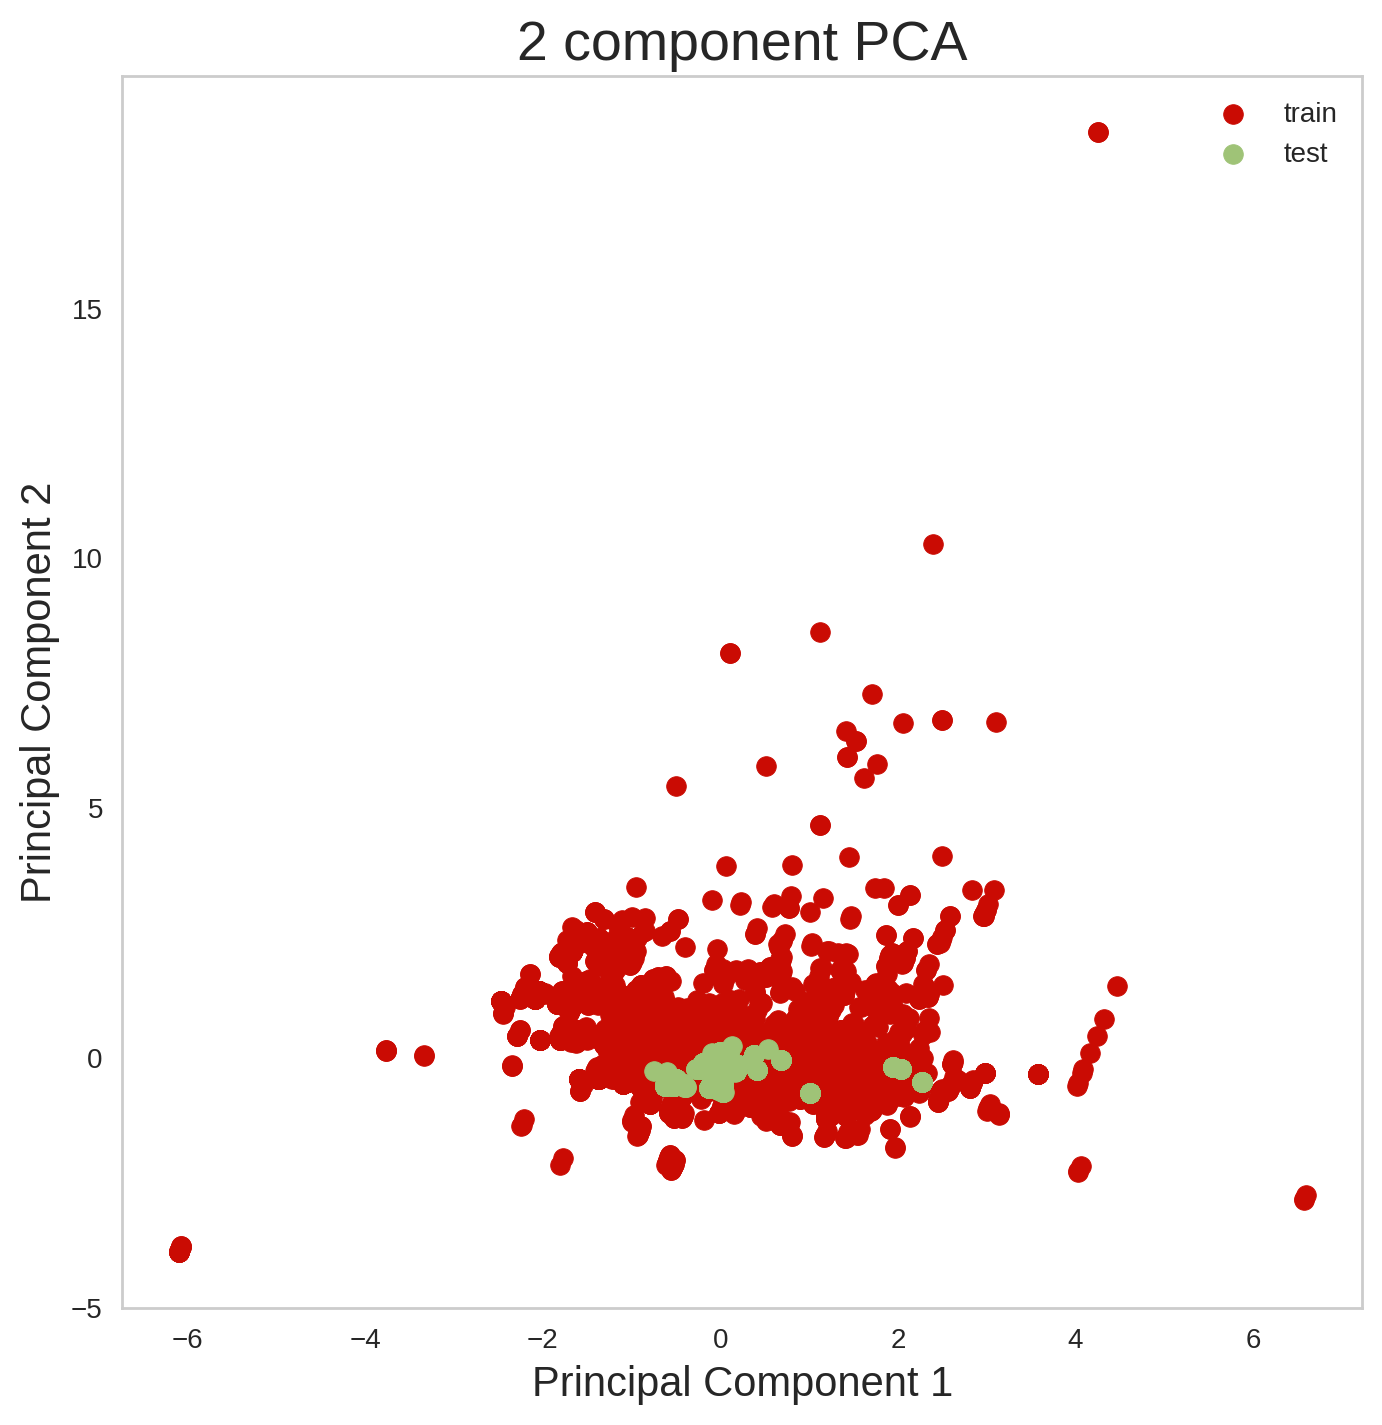

In [46]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['train', 'test']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [47]:
pca.explained_variance_ratio_

array([0.20894695, 0.17564546])